In [ ]:
! pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


# Specify the stock symbol and date range
symbol = "AAPL"

# Calculate the end date as today's date
end_date = datetime.today().strftime('%Y-%m-%d')

# Calculate the start date as 5 years ago from the end date
start_date = (datetime.today() - timedelta(days=365 * 5 + 1)).strftime('%Y-%m-%d')


# Fetch historical data using yfinance
data = yf.download(symbol, start=start_date, end=end_date)

# Reset the index to make the date a column
data.reset_index(inplace=True)

# Save DataFrame to a CSV file
data.to_csv('historical_data.csv', index=False)

print(end_date)
print(start_date)


[*********************100%%**********************]  1 of 1 completed
2023-12-07
2018-12-07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


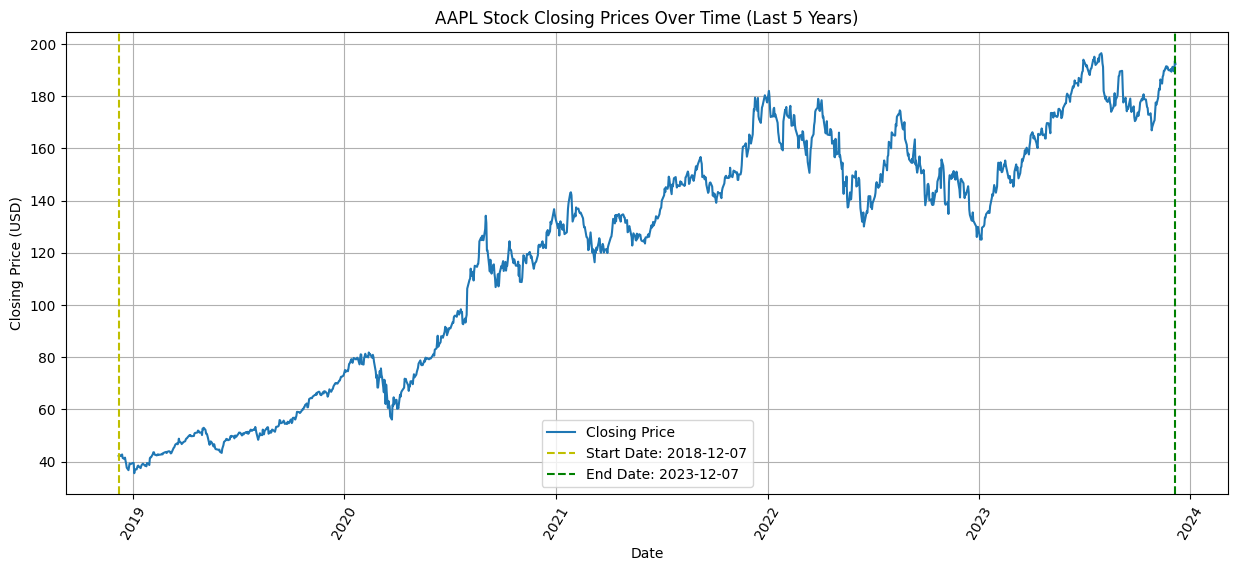

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['Close'], linestyle='-', label='Closing Price')
plt.title('AAPL Stock Closing Prices Over Time (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.xticks(rotation=60)
plt.grid(True)
# Highlight start date
plt.axvline(x=data['Date'].iloc[0], color='y', linestyle='--', label=f'Start Date: {start_date}')
# Highlight end date
plt.axvline(x=data['Date'].iloc[-1], color='g', linestyle='--', label=f'End Date: {end_date}')

plt.legend()
plt.show()

LSTM:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-07,43.372501,43.622501,42.075001,42.122501,40.429630,169126400
1,2018-12-10,41.250000,42.522499,40.832500,42.400002,40.695988,248104000
2,2018-12-11,42.915001,42.947498,41.750000,42.157501,40.463230,189126800
3,2018-12-12,42.599998,42.980000,42.255001,42.275002,40.576008,142510800
4,2018-12-13,42.622501,43.142502,42.387501,42.737499,41.019920,127594400


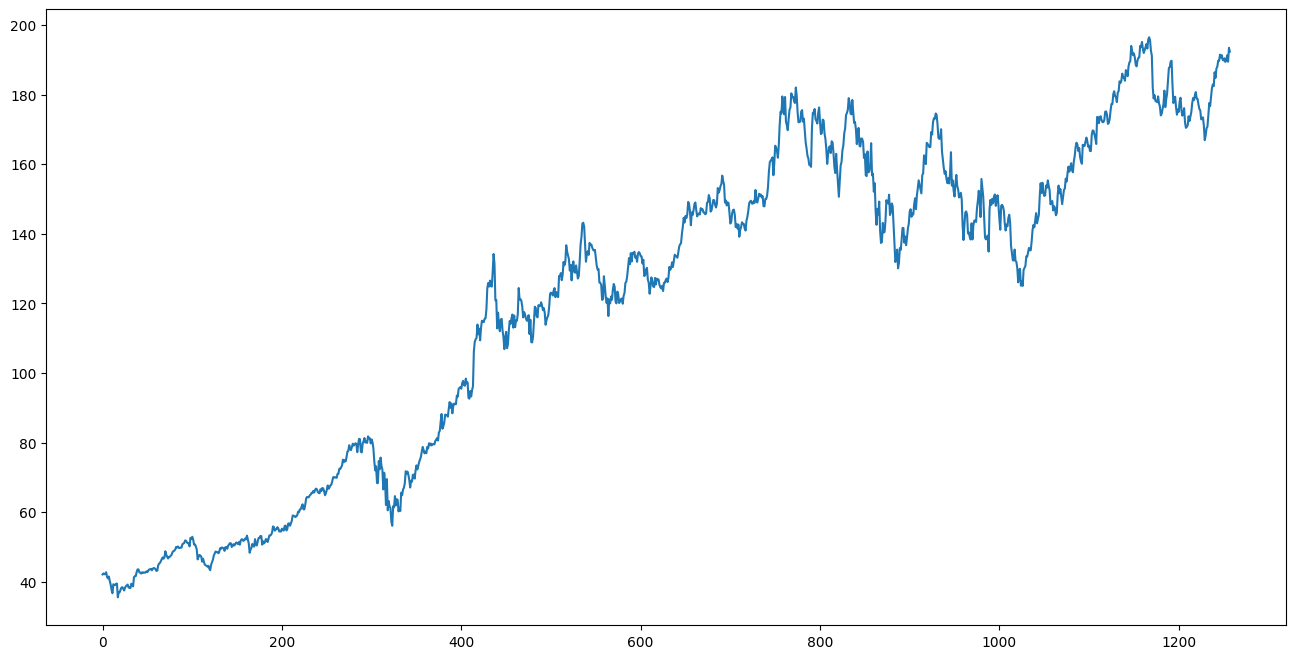

In [ ]:
# data["Date"] = pd.to_datetime(data.Date, format = "%Y-%m-%d")
# data.index = data['Date']

plt.figure(figsize= (16, 8))
plt.plot(data["Close"], label = "Close Price History")

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
#Sort the dataset on date time and filter “Date” and “Close” columns
data=data.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(data)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [ ]:
new_dataset.index = new_dataset['Date']
new_dataset.drop('Date', axis=1, inplace=True)

final_dataset = new_dataset.values

# Splitting the dataset into train and validation sets
train_data = final_dataset[0:987,:]
valid_data = final_dataset[987:,:]

# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_dataset)

# Creating a data structure with 60 time steps and 1 output
x_train_data, y_train_data = [], []

for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

# Converting to numpy arrays
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

# Reshaping the data to be 3-dimensional in the form [samples, time steps, features]
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

In [ ]:
#Build and train the LSTM model
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
# lstm_model.fit(x_train_data,y_train_data,epochs=,batch_size=1,verbose=2)
lstm_model.fit(x_train_data, y_train_data, epochs=15, batch_size=128, verbose=2)

Epoch 1/15
8/8 - 13s - loss: 0.1055 - 13s/epoch - 2s/step
Epoch 2/15
8/8 - 2s - loss: 0.0186 - 2s/epoch - 192ms/step
Epoch 3/15
8/8 - 2s - loss: 0.0102 - 2s/epoch - 223ms/step
Epoch 4/15
8/8 - 2s - loss: 0.0038 - 2s/epoch - 192ms/step
Epoch 5/15
8/8 - 2s - loss: 0.0029 - 2s/epoch - 259ms/step
Epoch 6/15
8/8 - 2s - loss: 0.0023 - 2s/epoch - 252ms/step
Epoch 7/15
8/8 - 2s - loss: 0.0015 - 2s/epoch - 225ms/step
Epoch 8/15
8/8 - 2s - loss: 0.0012 - 2s/epoch - 190ms/step
Epoch 9/15
8/8 - 1s - loss: 0.0011 - 1s/epoch - 178ms/step
Epoch 10/15
8/8 - 2s - loss: 0.0011 - 2s/epoch - 196ms/step
Epoch 11/15
8/8 - 1s - loss: 0.0011 - 1s/epoch - 181ms/step
Epoch 12/15
8/8 - 1s - loss: 0.0011 - 1s/epoch - 166ms/step
Epoch 13/15
8/8 - 1s - loss: 0.0011 - 1s/epoch - 182ms/step
Epoch 14/15
8/8 - 2s - loss: 0.0011 - 2s/epoch - 247ms/step
Epoch 15/15
8/8 - 2s - loss: 0.0011 - 2s/epoch - 260ms/step


In [ ]:
#Take a sample of a dataset to make stock price predictions using the LSTM model
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

9/9 [==============================] - 1s 18ms/step


In [ ]:
lstm_model.save("saved_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<ipython-input-14-41cf90219dba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


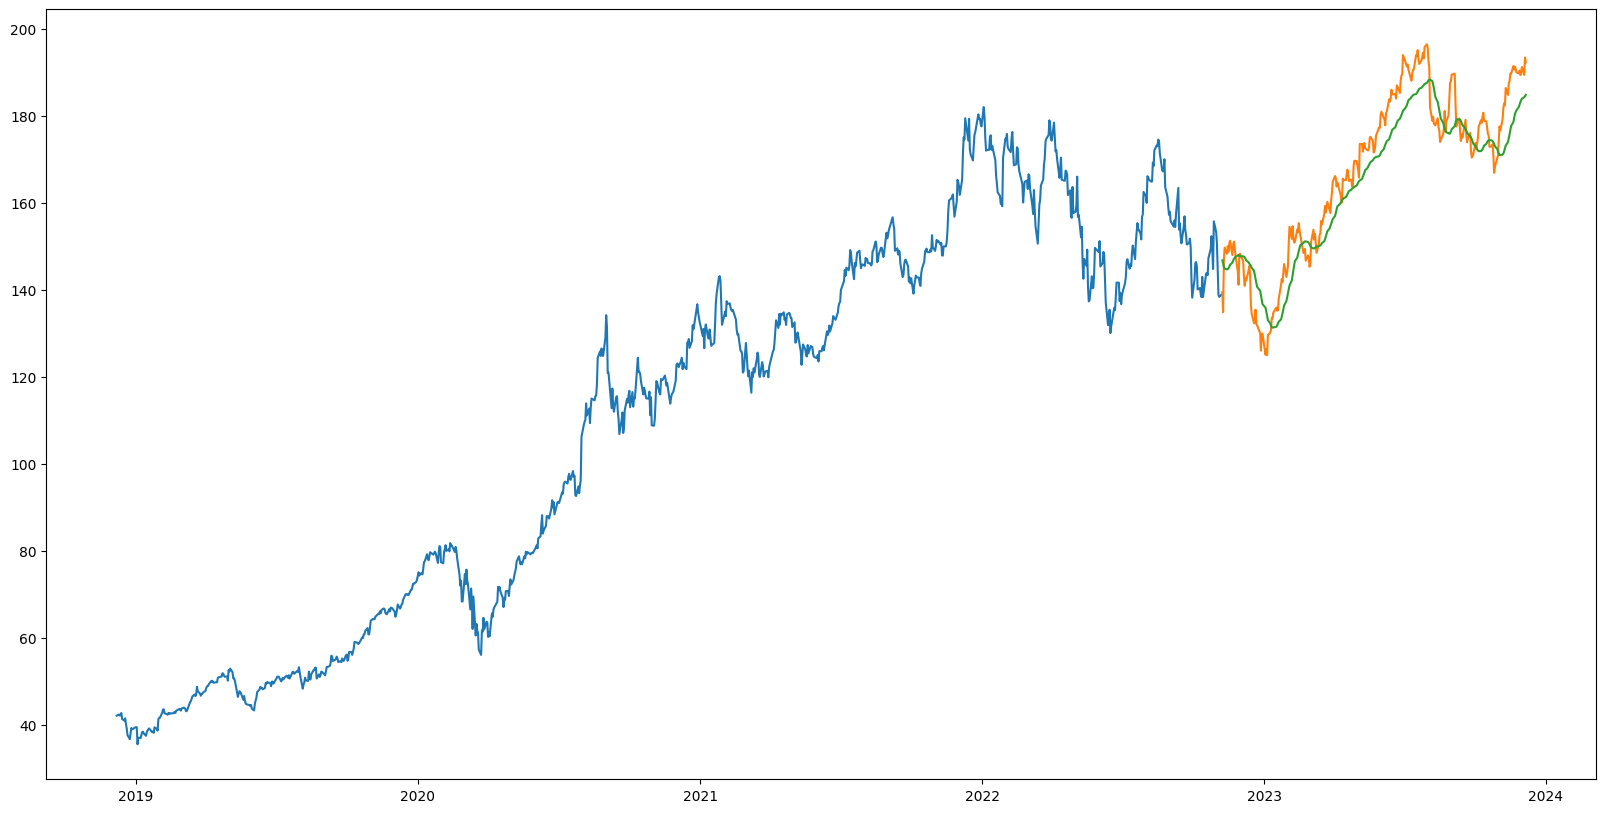

In [ ]:
#Visualize the predicted stock costs with actual stock costs
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

In [ ]:


data=data.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(data)),columns=['Date','Close'])

for i in range(0, len(data)):
    new_dataset["Date"][i] = data['Date'][i]
    new_dataset["Close"][i] = data["Close"][i]

new_dataset.index = new_dataset['Date']
new_dataset.drop('Date', axis=1, inplace=True)

final_dataset = new_dataset.values

# Splitting the dataset into train and validation sets
train_data = final_dataset[0:987, :]
valid_data = final_dataset[987:, :]

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_dataset)

# Creating a data structure with 60 time steps and 1 output
x_train_data, y_train_data = [], []

for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i-60:i, 0])
    y_train_data.append(scaled_data[i, 0])

# Converting to numpy arrays
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

# Reshaping the data to be 3-dimensional in the form [samples, time steps, features]
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

# Build and train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data = new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=20, batch_size=1, verbose=2)
# lstm_model.fit(x_train_data, y_train_data, epochs=15, batch_size=128, verbose=2)


Epoch 1/20
927/927 - 40s - loss: 0.0034 - 40s/epoch - 43ms/step
Epoch 2/20
927/927 - 34s - loss: 0.0012 - 34s/epoch - 36ms/step
Epoch 3/20
927/927 - 28s - loss: 9.6980e-04 - 28s/epoch - 31ms/step
Epoch 4/20
927/927 - 28s - loss: 8.3154e-04 - 28s/epoch - 31ms/step
Epoch 5/20
927/927 - 42s - loss: 7.0292e-04 - 42s/epoch - 45ms/step
Epoch 6/20
927/927 - 28s - loss: 6.0042e-04 - 28s/epoch - 31ms/step
Epoch 7/20
927/927 - 28s - loss: 5.6597e-04 - 28s/epoch - 31ms/step
Epoch 8/20
927/927 - 28s - loss: 4.7134e-04 - 28s/epoch - 31ms/step
Epoch 9/20
927/927 - 29s - loss: 3.9320e-04 - 29s/epoch - 31ms/step
Epoch 10/20
927/927 - 29s - loss: 4.2519e-04 - 29s/epoch - 31ms/step
Epoch 11/20
927/927 - 28s - loss: 4.5976e-04 - 28s/epoch - 31ms/step
Epoch 12/20
927/927 - 30s - loss: 4.3949e-04 - 30s/epoch - 33ms/step
Epoch 13/20
927/927 - 28s - loss: 3.8247e-04 - 28s/epoch - 30ms/step
Epoch 14/20
927/927 - 28s - loss: 4.1472e-04 - 28s/epoch - 30ms/step
Epoch 15/20
927/927 - 28s - loss: 4.2934e-04 - 28s/

9/9 [==============================] - 0s 24ms/step


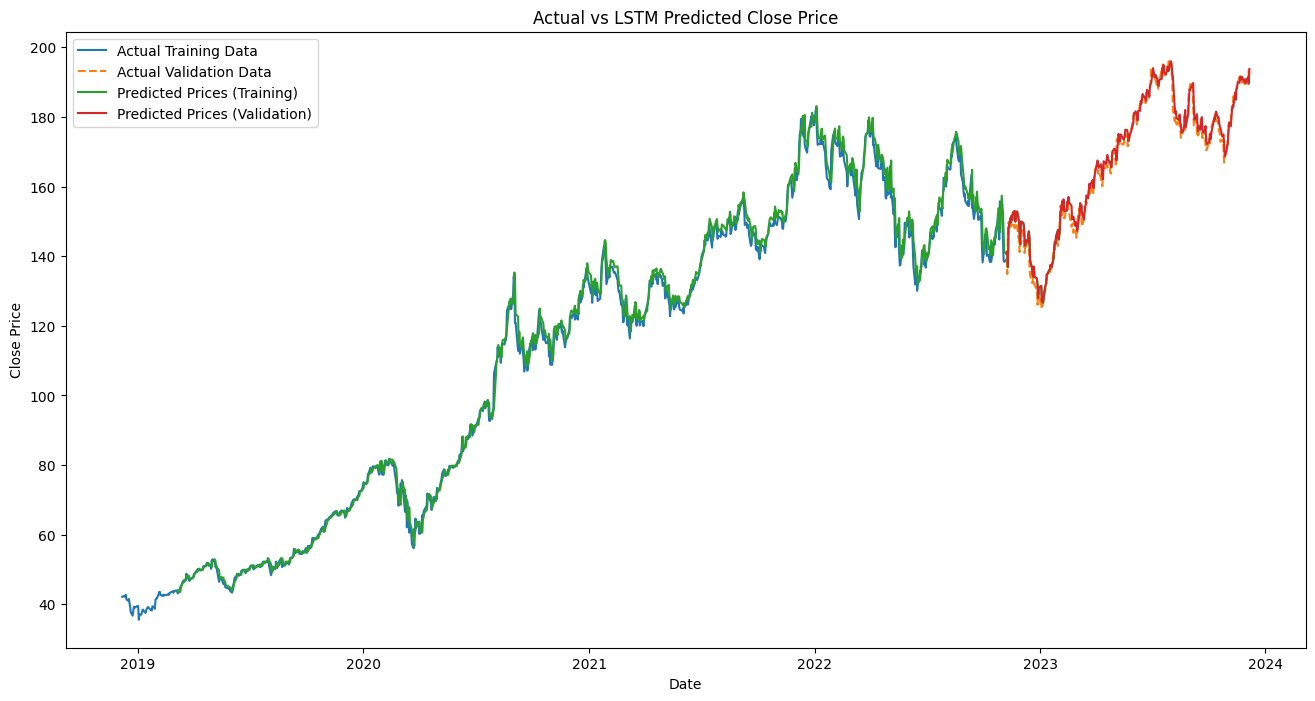

In [ ]:
# Predict the closing price for the training set
X_train = []
for i in range(60, len(train_data)+60):
    X_train.append(scaled_data[i-60:i, 0])
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
predicted_closing_price_train = lstm_model.predict(X_train)
predicted_closing_price_train = scaler.inverse_transform(predicted_closing_price_train)

# Take a sample of a dataset to make stock price predictions using the LSTM model for validation set
X_test=[]
for i in range(60, inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_closing_price_valid = lstm_model.predict(X_test)
predicted_closing_price_valid = scaler.inverse_transform(predicted_closing_price_valid)
# Visualize the predicted stock costs with actual stock costs
train_data = new_dataset[:987]
valid_data = new_dataset[987:]
valid_data['Predictions'] = predicted_closing_price_valid

# Adjust indices for predicted values
train_index = new_dataset.index[:987]
valid_index = new_dataset.index[987:987 + len(valid_data)]

# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(train_index, train_data["Close"], label='Actual Training Data')
plt.plot(valid_index, valid_data["Close"], label='Actual Validation Data', linestyle='--')

# Extend the indices for the validation set
valid_index_extended = new_dataset.index[987 - 60 : 987]  # Extend the indices by the window size
predicted_index_train = new_dataset.index[60:60 + len(predicted_closing_price_train)]  # Align indices with predictions

plt.plot(predicted_index_train, predicted_closing_price_train, label='Predicted Prices (Training)',)
plt.plot(valid_index, valid_data['Predictions'], label='Predicted Prices (Validation)',)

plt.title("Actual vs LSTM Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()



In [ ]:


from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_train = mean_absolute_error(train_data['Close'].iloc[60:], predicted_closing_price_train[:len(train_data)-60])
mse_train = mean_squared_error(train_data['Close'].iloc[60:], predicted_closing_price_train[:len(train_data)-60])
rmse_train = np.sqrt(mse_train)

print("Training Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")

# Calculate performance metrics for the validation set
mae_valid = mean_absolute_error(valid_data['Close'], predicted_closing_price_valid)
mse_valid = mean_squared_error(valid_data['Close'], predicted_closing_price_valid)
rmse_valid = np.sqrt(mse_valid)

print("\nValidation Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae_valid}")
print(f"Mean Squared Error (MSE): {mse_valid}")
print(f"Root Mean Squared Error (RMSE): {rmse_valid}")


Training Set Metrics:
Mean Absolute Error (MAE): 1.9475123581377047
Mean Squared Error (MSE): 7.436772638942419
Root Mean Squared Error (RMSE): 2.7270446712407224

Validation Set Metrics:
Mean Absolute Error (MAE): 2.00329907969795
Mean Squared Error (MSE): 6.917526230970578
Root Mean Squared Error (RMSE): 2.6301190526230136


In [ ]:
results = []
lstm_results = {
    "model": "LSTM",
    "mae_train": mae_train,
    "mse_train": mse_train,
    "rmse_train": rmse_train,
    "mae_valid": mae_valid,
    "mse_valid": mse_valid,
    "rmse_valid": rmse_valid,
}

results.append(lstm_results);

##ARIMA

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.0 MB/s eta 0:00:00


In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4640.596, Time=2.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4638.646, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4636.060, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4635.751, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4638.488, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4636.613, Time=0.93 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4636.806, Time=0.60 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4638.569, Time=2.82 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4635.898, Time=0.20 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 7.778 seconds


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


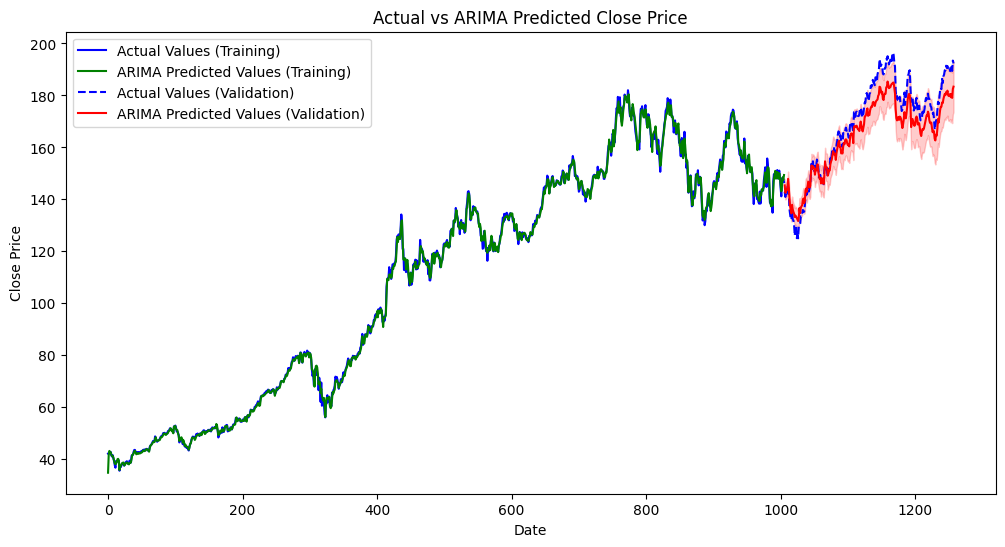

In [ ]:

import pandas as pd
import numpy as np
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
df=data
# Assuming 'df' is your DataFrame
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Feature Engineering
lag_features = ["High", "Low", "Volume"]
df_rolled_7d = df[lag_features].rolling(window=7, min_periods=1).mean().add_suffix('_mean_7d')
df_rolled_30d = df[lag_features].rolling(window=30, min_periods=1).mean().add_suffix('_mean_30d')

# Merge the rolled features back to the original DataFrame
df = pd.concat([df, df_rolled_7d, df_rolled_30d], axis=1)

# Create Training and Validation sets
train_size = int(0.8 * len(df))  # 80% of the data for training
df_train = df[:train_size]
df_valid = df[train_size:]

# ARIMA Model
exogenous_features = lag_features + ["High_mean_7d", "Low_mean_7d", "Volume_mean_7d", "High_mean_30d", "Low_mean_30d", "Volume_mean_30d"]

# Perform auto ARIMA to get optimal parameters
arima_model = auto_arima(
    df_train["Close"],
    exogenous=df_train[exogenous_features],
    trace=True,
    error_action="ignore",
    suppress_warnings=True
)

# Fit ARIMA model with optimal parameters
arima_result = ARIMA(
    df_train["Close"],
    exog=df_train[exogenous_features],
    order=arima_model.order,
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

# Make predictions on the training and validation sets
arima_forecast_train = arima_result.get_prediction(start=df_train.index[0], end=df_train.index[-1], exog=df_train[exogenous_features])
arima_forecast_valid = arima_result.get_forecast(steps=len(df_valid), exog=df_valid[exogenous_features])


arima_mean_train = arima_forecast_train.predicted_mean
arima_mean_valid = arima_forecast_valid.predicted_mean
arima_conf_int_valid = arima_forecast_valid.conf_int()

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the actual values for training set
plt.plot(df_train.index, df_train["Close"], label="Actual Values (Training)", color="blue")

# Plot the predicted values for training set
plt.plot(df_train.index, arima_mean_train, label="ARIMA Predicted Values (Training)", color="green")

# Plot the actual values for validation set
plt.plot(df_valid.index, df_valid["Close"], label="Actual Values (Validation)", color="blue", linestyle="--")

# Plot the predicted values for validation set
plt.plot(df_valid.index, arima_mean_valid, label="ARIMA Predicted Values (Validation)", color="red")

# Fill the confidence interval for validation set
plt.fill_between(df_valid.index, arima_conf_int_valid.iloc[:, 0], arima_conf_int_valid.iloc[:, 1], color='red', alpha=0.2)

# Set plot labels and title
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs ARIMA Predicted Close Price")
plt.legend()

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate performance metrics for training set
mae_train = mean_absolute_error(df_train["Close"], arima_mean_train)
mse_train = mean_squared_error(df_train["Close"], arima_mean_train)
rmse_train = np.sqrt(mse_train)


print("Training Set Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")

# Calculate performance metrics for validation set
mae_valid = mean_absolute_error(df_valid["Close"], arima_mean_valid)
mse_valid = mean_squared_error(df_valid["Close"], arima_mean_valid)
rmse_valid = np.sqrt(mse_valid)

print("\nValidation Set Metrics:")
print(f"MAE: {mae_valid}")
print(f"MSE: {mse_valid}")
print(f"RMSE: {rmse_valid}")

Training Set Metrics:
MAE: 0.9588679238119394
MSE: 1.8130154426769631
RMSE: 1.3464826187801175

Validation Set Metrics:
MAE: 5.543692533716301
MSE: 40.079578729910736
RMSE: 6.330843445379986


In [ ]:
arima_results = {
    "model": "ARIMA",
    "mae_train": mae_train,
    "mse_train": mse_train,
    "rmse_train": rmse_train,
    "mae_valid": mae_valid,
    "mse_valid": mse_valid,
    "rmse_valid": rmse_valid,
}

results.append(arima_results);

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


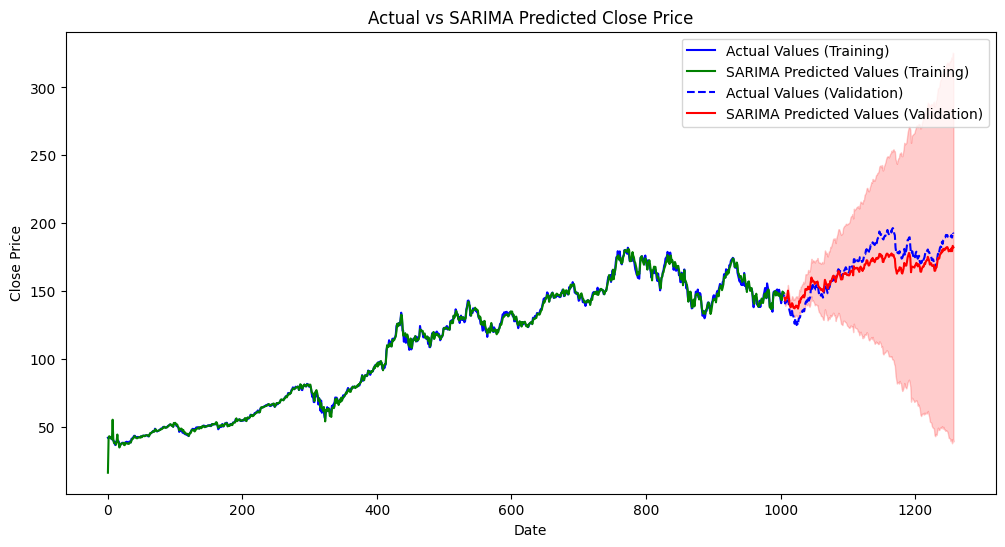

In [ ]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


# df = data
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Feature Engineering
lag_features = ["High", "Low", "Volume"]
df_rolled_7d = df[lag_features].rolling(window=7, min_periods=1).mean().add_suffix('_mean_7d')
df_rolled_30d = df[lag_features].rolling(window=30, min_periods=1).mean().add_suffix('_mean_30d')

# Merge the rolled features back to the original DataFrame
df = pd.concat([df, df_rolled_7d, df_rolled_30d], axis=1)

# Create Training and Validation sets
train_size = int(0.8 * len(df))  # 80% of the data for training
df_train = df[:train_size]
df_valid = df[train_size:]

# SARIMA Model
exogenous_features = lag_features + ["High_mean_7d", "Low_mean_7d", "Volume_mean_7d", "High_mean_30d", "Low_mean_30d", "Volume_mean_30d"]

# Fit SARIMA model
sarima_model = SARIMAX(
    df_train["Close"],
    exog=df_train[exogenous_features],
    order=(1, 1, 1),  # You might need to experiment with these parameters
    seasonal_order=(1, 1, 1, 7),  # Seasonal order (p, d, q, s)
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_result = sarima_model.fit(disp=False)

# Make predictions on the training and validation sets
sarima_forecast_train = sarima_result.get_prediction(start=df_train.index[0], end=df_train.index[-1])
sarima_forecast_valid = sarima_result.get_forecast(steps=len(df_valid), exog=df_valid[exogenous_features])
sarima_mean_train = sarima_forecast_train.predicted_mean
sarima_mean_valid = sarima_forecast_valid.predicted_mean
sarima_conf_int_valid = sarima_forecast_valid.conf_int()

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the actual values for training set
plt.plot(df_train.index, df_train["Close"], label="Actual Values (Training)", color="blue")

# Plot the predicted values for training set
plt.plot(df_train.index, sarima_mean_train, label="SARIMA Predicted Values (Training)", color="green")

# Plot the actual values for validation set
plt.plot(df_valid.index, df_valid["Close"], label="Actual Values (Validation)", color="blue", linestyle="--")

# Plot the predicted values for validation set
plt.plot(df_valid.index, sarima_mean_valid, label="SARIMA Predicted Values (Validation)", color="red")

# Fill the confidence interval for validation set
plt.fill_between(df_valid.index, sarima_conf_int_valid.iloc[:, 0], sarima_conf_int_valid.iloc[:, 1], color='red', alpha=0.2)

# Set plot labels and title
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs SARIMA Predicted Close Price")
plt.legend()

# Show the plot
plt.show()


In [ ]:
# SARIMA metrics
mae_train = mean_absolute_error(df_train["Close"], sarima_mean_train)
mse_train = mean_squared_error(df_train["Close"], sarima_mean_train)
rmse_train = np.sqrt(mse_train)

mae_valid = mean_absolute_error(df_valid["Close"], sarima_mean_valid)
mse_valid = mean_squared_error(df_valid["Close"], sarima_mean_valid)
rmse_valid = np.sqrt(mse_valid)

In [ ]:
sarima_results = {
    "model": "SARIMA",
    "mae_train": mae_train,
    "mse_train": mse_train,
    "rmse_train": rmse_train,
    "mae_valid": mae_valid,
    "mse_valid": mse_valid,
    "rmse_valid": rmse_valid,
}

results.append(sarima_results);

#Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplme8k1i3/o5l7jti_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplme8k1i3/kw_tbf9j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39207', 'data', 'file=/tmp/tmplme8k1i3/o5l7jti_.json', 'init=/tmp/tmplme8k1i3/kw_tbf9j.json', 'output', 'file=/tmp/tmplme8k1i3/prophet_modelrn98drj8/prophet_model-20231207234650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:46:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:46:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


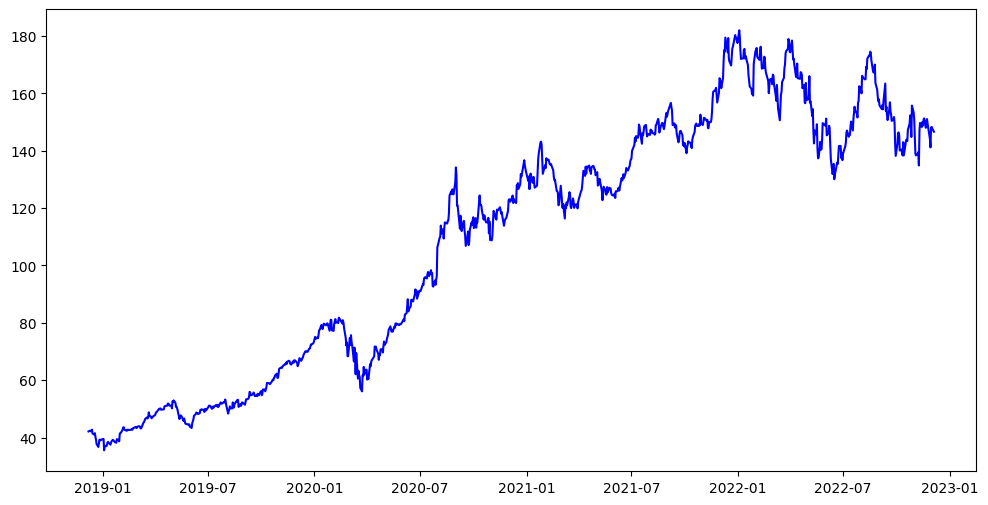

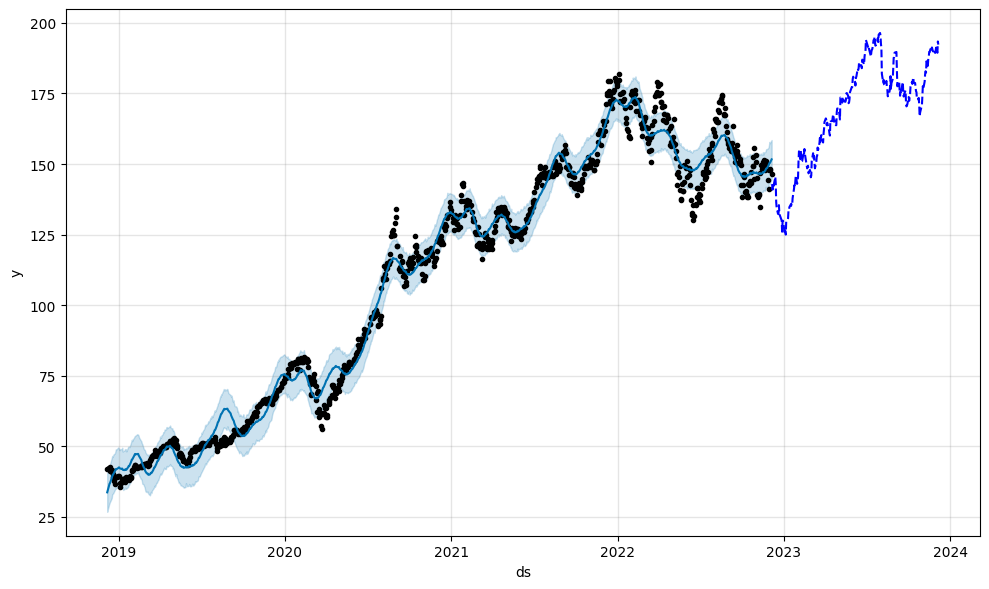

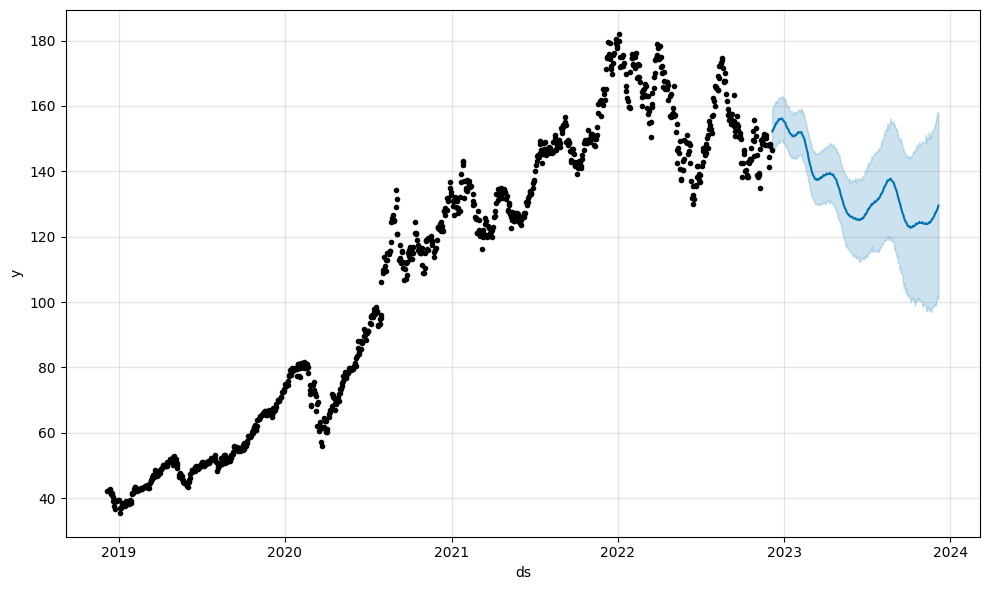

In [ ]:
from prophet import Prophet
df = data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# Assuming df contains the necessary columns: ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]

# Feature Engineering (if needed)
lag_features = ["High", "Low", "Volume"]
df_rolled_7d = df[lag_features].rolling(window=7, min_periods=1).mean().add_suffix('_mean_7d')
df_rolled_30d = df[lag_features].rolling(window=30, min_periods=1).mean().add_suffix('_mean_30d')

# Merge the rolled features back to the original DataFrame
df = pd.concat([df, df_rolled_7d, df_rolled_30d], axis=1)

# Create Training and Validation sets
train_size = int(0.8 * len(df))  # 80% of the data for training
df_train = df[:train_size]
df_valid = df[train_size:]

# Prophet Model
prophet_model = Prophet()

# Adding regressors (exogenous features) to the model
exogenous_features = ["High", "Low", "Volume", "High_mean_7d", "Low_mean_7d", "Volume_mean_7d", "High_mean_30d", "Low_mean_30d", "Volume_mean_30d"]

# Prepare the training data
prophet_train_data = df_train.reset_index()[["Date", "Close"] + exogenous_features].rename(columns={"Date": "ds", "Close": "y"})

# Fit the Prophet model
prophet_model.fit(prophet_train_data)

# Prepare the test data
prophet_test_data = df_valid.reset_index()[["Date", "Close"] + exogenous_features].rename(columns={"Date": "ds", "Close": "y"})

# Make predictions on the test set
prophet_forecast = prophet_model.predict(prophet_test_data)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the actual values for training set
plt.plot(df_train.index, df_train["Close"], label="Actual Values (Training)", color="blue")

# Plot the predicted values for training set
prophet_train_plot = prophet_model.plot(prophet_model.predict(prophet_train_data))

# Plot the actual values for validation set
plt.plot(df_valid.index, df_valid["Close"], label="Actual Values (Validation)", color="blue", linestyle="--")

# Plot the predicted values for validation set
prophet_valid_plot = prophet_model.plot(prophet_model.predict(prophet_test_data))

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_train = mean_absolute_error(df_train["Close"], prophet_train_data["y"][:len(df_train)])
mse_train = mean_squared_error(df_train["Close"], prophet_train_data["y"][:len(df_train)])
rmse_train = np.sqrt(mse_train)


# Calculate performance metrics for the validation set
mae_valid = mean_absolute_error(df_valid["Close"], prophet_forecast["yhat"][:len(df_valid)])
mse_valid = mean_squared_error(df_valid["Close"], prophet_forecast["yhat"][:len(df_valid)])
rmse_valid = np.sqrt(mse_valid)



In [ ]:
prophet_results = {
    "model": "PROPHET",
    "mae_train": mae_train,
    "mse_train": mse_train,
    "rmse_train": rmse_train,
    "mae_valid": mae_valid,
    "mse_valid": mse_valid,
    "rmse_valid": rmse_valid,
}

results.append(prophet_results);

In [ ]:
# Print or analyze the results
for result in results:
    print(f"\nMetrics for {result['model']} Model:")
    print(f"Training Set - MAE: {result['mae_train']}, MSE: {result['mse_train']}, RMSE: {result['rmse_train']}")
    print(f"Validation Set - MAE: {result['mae_valid']}, MSE: {result['mse_valid']}, RMSE: {result['rmse_valid']}")


Metrics for LSTM Model:
Training Set - MAE: 4.043821785442266, MSE: 29.326880379125633, RMSE: 5.415429842507946
Validation Set - MAE: 5.864365609369595, MSE: 46.38863515662269, RMSE: 6.810920287055391

Metrics for ARIMA Model:
Training Set - MAE: 0.9588679238119394, MSE: 1.8130154426769631, RMSE: 1.3464826187801175
Validation Set - MAE: 5.543692533716301, MSE: 40.079578729910736, RMSE: 6.330843445379986

Metrics for SARIMA Model:
Training Set - MAE: 1.2452256431032, MSE: 3.749893612119151, RMSE: 1.9364642036761617
Validation Set - MAE: 7.739895462476995, MSE: 81.01374572741119, RMSE: 9.000763619127612

Metrics for PROPHET Model:
Training Set - MAE: 0.0, MSE: 0.0, RMSE: 0.0
Validation Set - MAE: 38.45747004466722, MSE: 1877.3637382551956, RMSE: 43.32855569085122

Metrics for LSTM Model:
Training Set - MAE: 1.9475123581377047, MSE: 7.436772638942419, RMSE: 2.7270446712407224
Validation Set - MAE: 2.00329907969795, MSE: 6.917526230970578, RMSE: 2.6301190526230136
